# **Customer Purchasing Behavior Analysis**

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sales_df = pd.read_csv('/content/drive/MyDrive/DataScienceProject/BlackFriday.csv')
sales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## **Data Cleaning**

In [ ]:
sales_df.shape

(537577, 12)

**Variable Definition**

1. User_ID	-  User ID
2. Product_ID	-  Product ID
3. Gender	-  Sex of User
4. Age	-  Age in bins
5. Occupation -	Occupation (Masked)
6. City_Category  -	Category of the City (A,B,C)
7. Stay_In_Current_City_Years -	Number of years stay in current city
8. Marital_Status -	Marital Status
9. Product_Category_1 -	Product Category (Masked)
10. Product_Category_2	-  Product may belongs to other category also (Masked)
11. Product_Category_3	-  Product may belongs to other category also (Masked)

*Eg. A brand of health juice, can come in the beverages category and also in the health category*

12. Purchase	-  Purchase Amount (Target Variable)

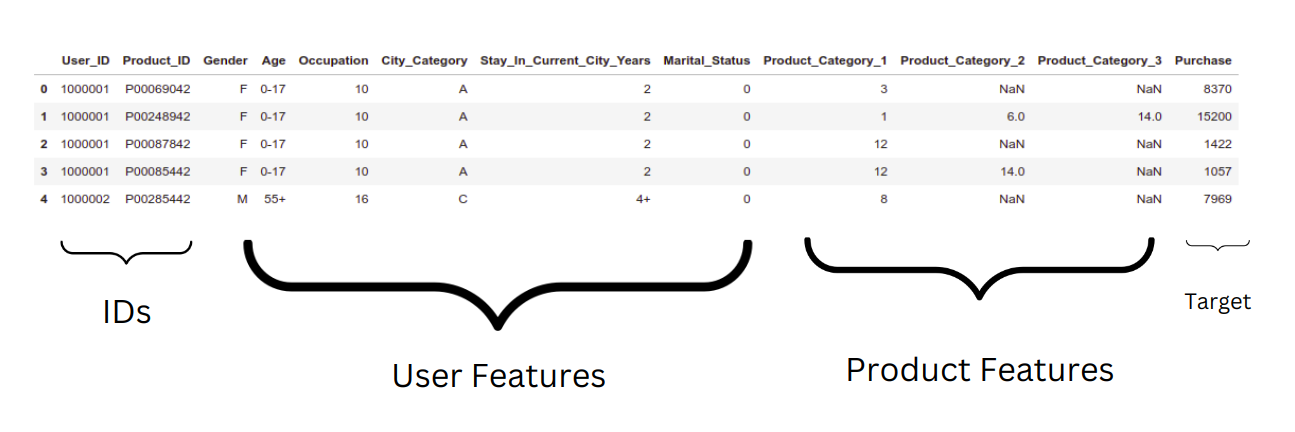

In [28]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [29]:
print("Unique values list")
print("---------------------")
for col in sales_df:
    print(col, "-->", len(sales_df[col].unique()))

Unique values list
---------------------
User_ID --> 5891
Product_ID --> 3623
Gender --> 2
Age --> 7
Occupation --> 21
City_Category --> 3
Stay_In_Current_City_Years --> 5
Marital_Status --> 2
Product_Category_1 --> 18
Product_Category_2 --> 18
Product_Category_3 --> 16
Purchase --> 17959


In [ ]:
sales_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

The null data is quite a lot compared to non-null in two of the categories, so we impute rather than deleting

---

The available approaches are imputing the missing values with mean, mode or fill with 0. Since the Product_Catgeory_2 & Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, hence imputing with mean/mode is not a good strategy, hence we will fill the Nan values with 0.


In [ ]:
#Fill na with Zero
sales_df.fillna(0, inplace=True)

In [ ]:
sales_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
sales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [ ]:
sales_df.drop_duplicates()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,0.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,0.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,0.0,0.0,7172


## **Exploratory Data Analysis**

In [ ]:
# Number of unique customers
len(sales_df['User_ID'].unique())

5891

In [ ]:
# Number of unique products sold
len(sales_df['Product_ID'].unique())

3623

There are two aspects of focus in this data: 
1. **User** - which focuses on the demographic of the user including features like gender, age, occupation, marital status and city category
2. **Product** - which focuses on the product categories:1,2,3, and the respective purchases

*Purchase* is the target column in case we want to predict the purchase amount based on the user demographic and product category



---


It wouldn't be fair to analyse both at once to identify the buyer demography because one user has purchased multiple number of items, and that record creates biasness.

### **User Focused**

The product categories are removed along with the product_id in order to identify the unique users

In [22]:
sales_user_df = sales_df.drop(columns=['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'])

In [ ]:
sales_user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,8370
1,1000001,F,0-17,10,A,2,0,15200
2,1000001,F,0-17,10,A,2,0,1422
3,1000001,F,0-17,10,A,2,0,1057
4,1000002,M,55+,16,C,4+,0,7969


The users are grouped on the basis of their ids and their purchases is summed.

In [23]:
total_purchase = sales_user_df.groupby(['User_ID'])['Purchase'].sum()

In [24]:
sales_user_df = sales_user_df.drop(columns=['Purchase'])
sales_user_df = sales_user_df.drop_duplicates()

In [ ]:
total_purchase

User_ID
1000001     333481
1000002     810353
1000003     341635
1000004     205987
1000005     821001
            ...   
1006036    3821666
1006037    1075037
1006038      80859
1006039     554504
1006040    1562615
Name: Purchase, Length: 5891, dtype: int64

In [ ]:
type(total_purchase)

pandas.core.series.Series

In [ ]:
len(total_purchase.values)

5891


Our end result is a dataframe with user information and the total amount they have spent on their purchases independent of the product category.

In [25]:
sales_user_df['Total_Purchase'] = total_purchase.values

In [ ]:
sales_user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase
0,1000001,F,0-17,10,A,2,0,333481
4,1000002,M,55+,16,C,4+,0,810353
5,1000003,M,26-35,15,A,3,0,341635
6,1000004,M,46-50,7,B,2,1,205987
9,1000005,M,26-35,20,A,1,1,821001


#### **Utility Functions**

In [ ]:
# Pie chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%'.format(pct, v=val)
    return my_format

def show_pie_chart(count, labels):
  if labels==[]:
    labels=count.index
  sns.set(rc={'figure.figsize':(10,5)})
  plt.pie(count,labels = labels, autopct=autopct_format(count))
  plt.show()

In [ ]:
# Average Purchase
def central_tendencies(feature):
  median_gender_sales = sales_user_df.groupby(feature)['Total_Purchase'].median()
  mean_gender_sales = sales_user_df.groupby(feature)['Total_Purchase'].mean()

  my_colors = list('bcrgkym')  #red, green, blue, black, etc.

  median_gender_sales.plot(kind='bar', color=my_colors, figsize=(8, 5))
  plt.title("Median Purchase Amount Based on "+ feature)

  print(median_gender_sales)
  print(mean_gender_sales)

#### **Exploratory Data Analysis**

EDA of various features attributing to the user.

M    4225
F    1666
Name: Gender, dtype: int64


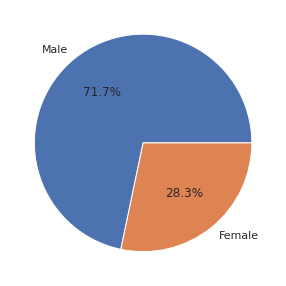

In [ ]:
# Purchase Count based on Gender of Users
gender_count = sales_user_df['Gender'].value_counts()
print(gender_count)

show_pie_chart(gender_count, ['Male', 'Female'])

Gender
F    538254.0
M    507795.0
Name: Total_Purchase, dtype: float64
Gender
F    876008.343938
M    842186.621775
Name: Total_Purchase, dtype: float64


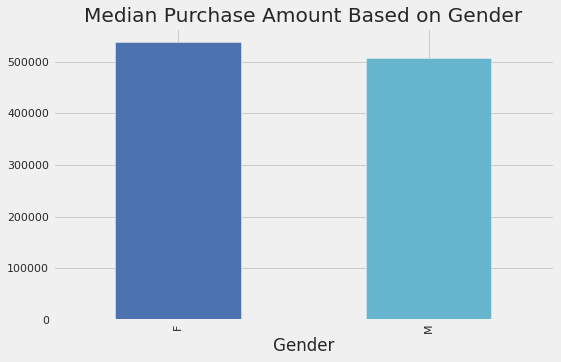

In [ ]:
# Average Male and Female Purchase Amount
central_tendencies('Gender')

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64


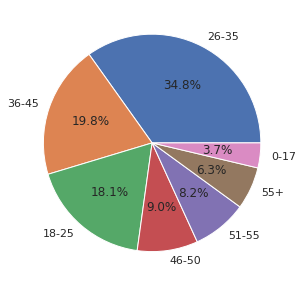

In [ ]:
# Based on Age
age_count = sales_user_df['Age'].value_counts()
print(age_count)

show_pie_chart(age_count,[])

Age
0-17     555754.5
18-25    509915.0
26-35    504267.0
36-45    512174.0
46-50    566637.0
51-55    523833.0
55+      503257.0
Name: Total_Purchase, dtype: float64
Age
0-17     919719.477064
18-25    844266.887746
26-35    851840.635168
36-45    845521.623822
46-50    875975.152542
51-55    833758.049896
55+      841170.005376
Name: Total_Purchase, dtype: float64


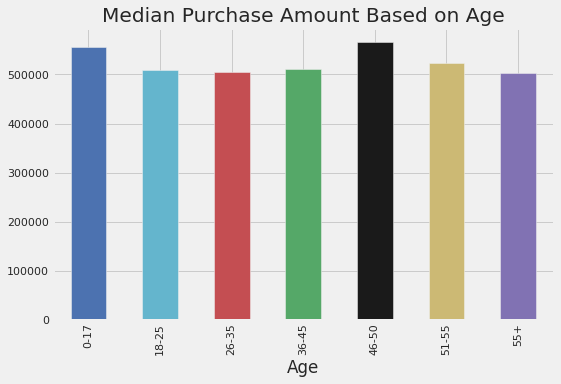

In [ ]:
central_tendencies('Age')

Why is the median purchase so high for 0-17 age groups? Who is buying and what are they buying?

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

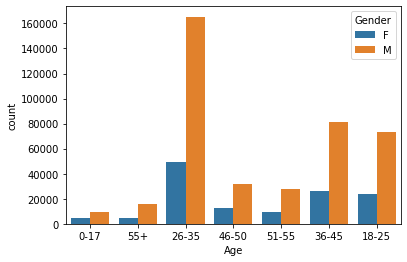

In [ ]:
# Gender and age
sns.countplot(sales_user_df['Age'],hue=sales_user_df['Gender'])

0    3417
1    2474
Name: Marital_Status, dtype: int64


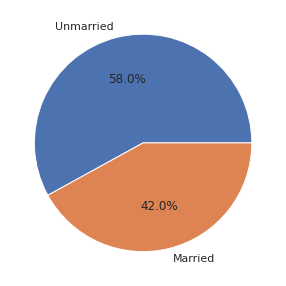

In [ ]:
# Based on Marital Status
mar_count = sales_user_df['Marital_Status'].value_counts()
print(mar_count)

show_pie_chart(mar_count,["Unmarried", "Married"])

In [26]:
# Combining Marital status and gender
sales_user_df['combined_G_M'] = sales_user_df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(sales_user_df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

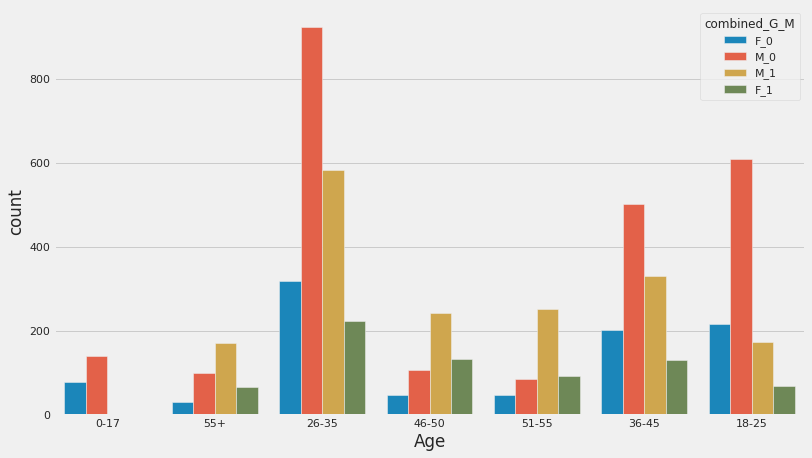

In [ ]:
# Age combined with gender and marital status
sns.countplot(sales_user_df['Age'],hue=sales_user_df['combined_G_M'])

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64


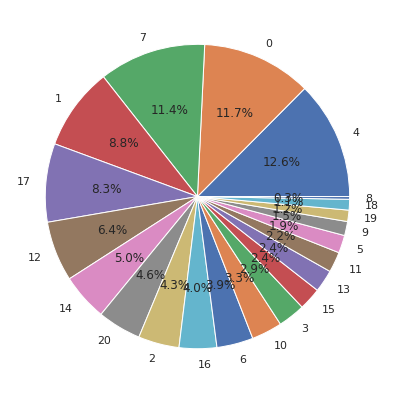

In [ ]:
# Based on Occupation

occ_count = sales_user_df['Occupation'].value_counts()
print(occ_count)

show_pie_chart(occ_count,[])

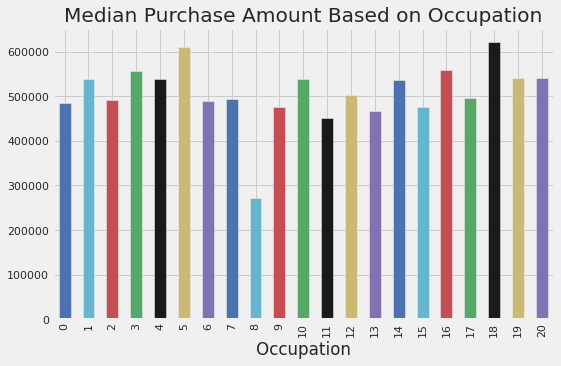

In [ ]:
central_tendencies('Occupation')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

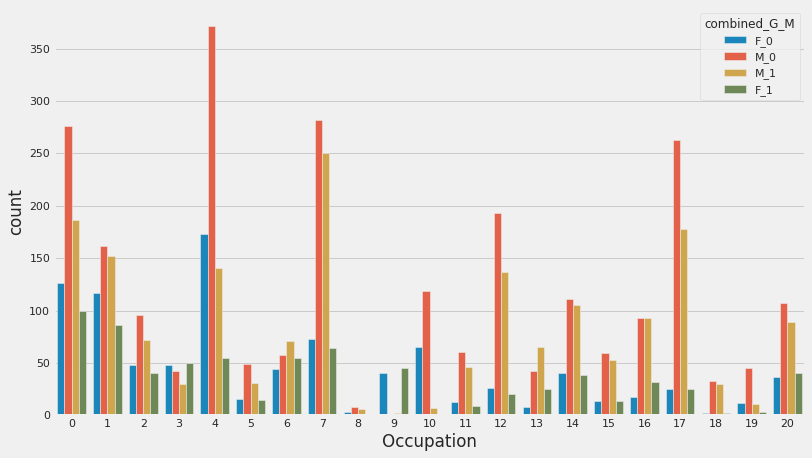

In [ ]:
# Occupation combined with gender and marital status
sns.countplot(sales_user_df['Occupation'],hue=sales_user_df['combined_G_M'])

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64


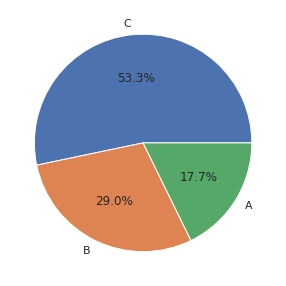

In [ ]:
# Based on City Category

city_cat_count = sales_user_df['City_Category'].value_counts()
print(city_cat_count)

show_pie_chart(city_cat_count,[])

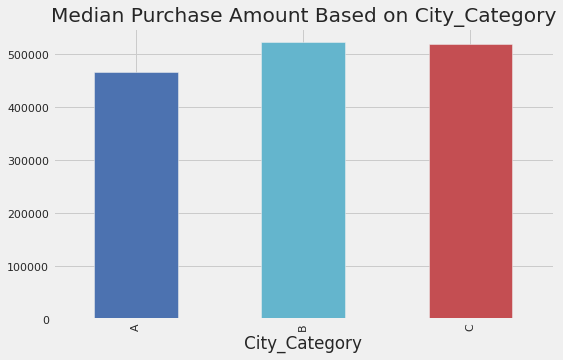

In [ ]:
central_tendencies('City_Category')

### **Product-based Purchase Analysis**

This part of EDA focuses on the purchases made by the users.

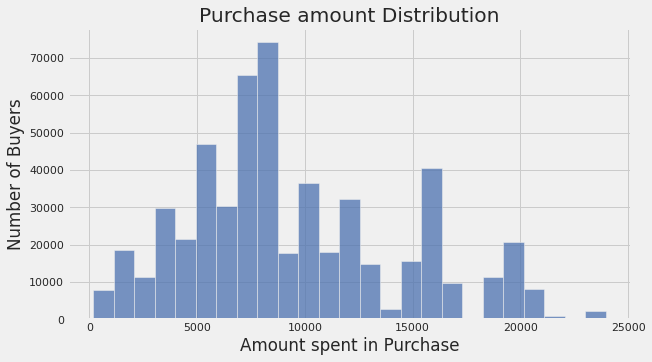

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,5))
sns.histplot(sales_df["Purchase"], bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


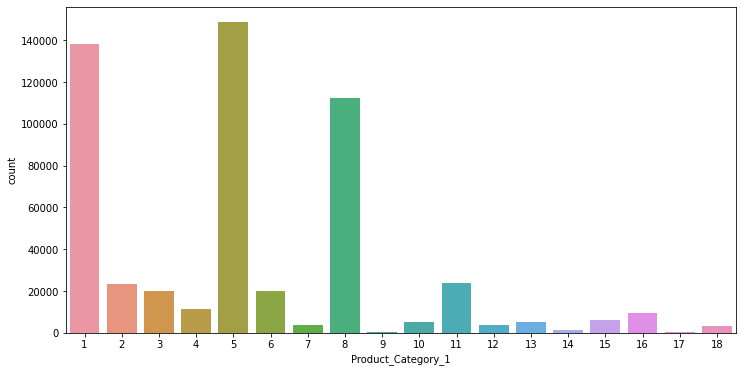

In [76]:
# Product category 1 visualization
plt.figure(figsize=(12,6))
sns.countplot(sales_df['Product_Category_1'])
plt.show()

<AxesSubplot:xlabel='Product_Category_1'>

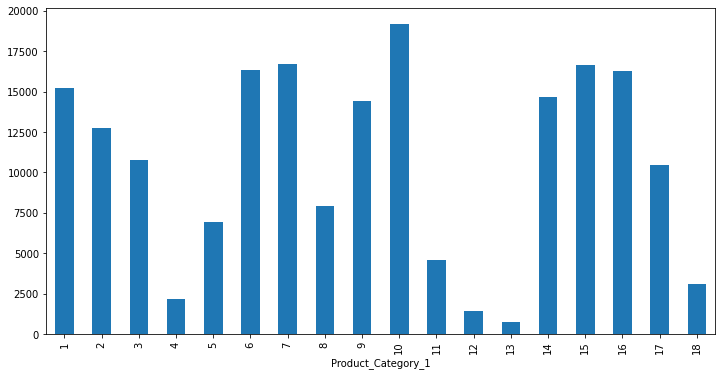

In [74]:
plt.figure(figsize=(12,6))
sales_df.groupby('Product_Category_1')['Purchase'].median().plot(kind='bar')

#### **Gender and Marital Status Based**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

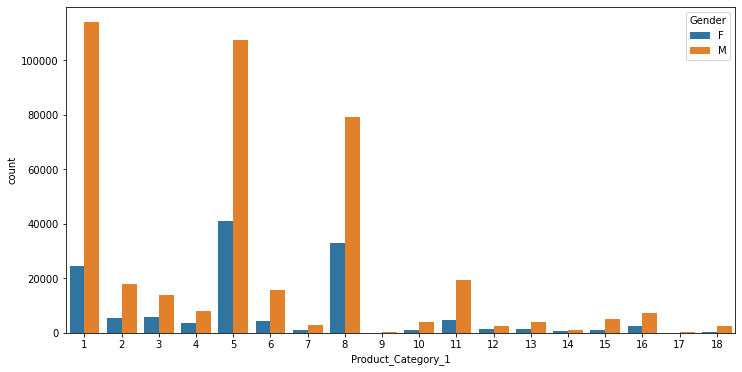

In [12]:
# Product Category with Gender
plt.figure(figsize=(12,6))
sns.countplot(sales_df['Product_Category_1'], hue=sales_df['Gender'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

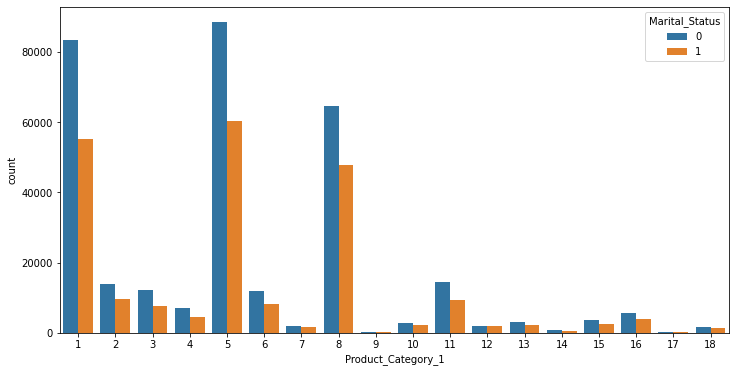

In [13]:
# Product Category 1 and Age
plt.figure(figsize=(12,6))
sns.countplot(sales_df['Product_Category_1'], hue=sales_df['Marital_Status'])

In [65]:
# Product Category with Gender and Marital Status
sales_df['combine_gender_marital'] = sales_df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(sales_df['combine_gender_marital'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


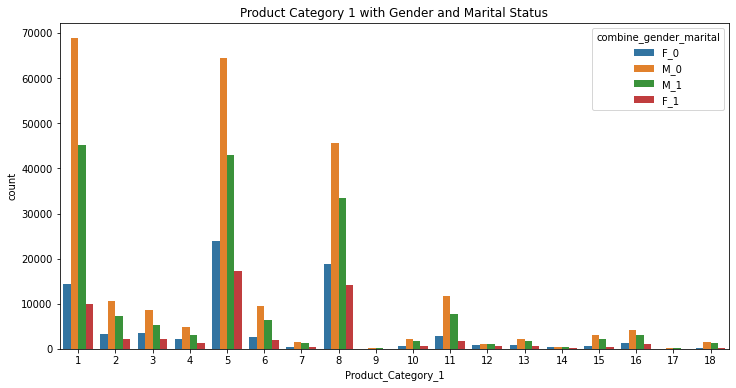

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(sales_df['Product_Category_1'], hue=sales_df['combine_gender_marital'])
plt.title('Product Category 1 with Gender and Marital Status')
plt.show()

#### **Age-based**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


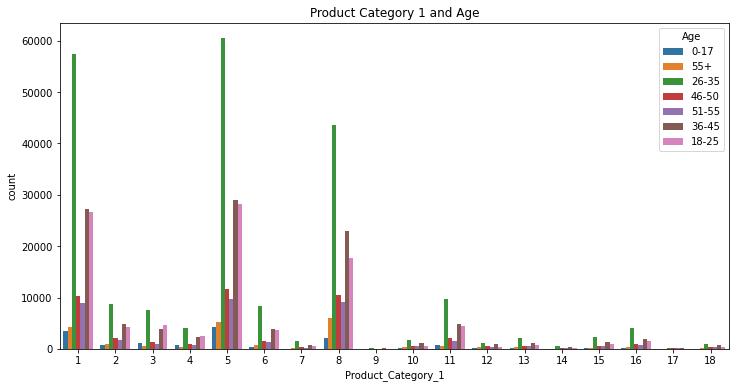

In [67]:
# Product Category and Age
plt.figure(figsize=(12,6))
sns.countplot(sales_df['Product_Category_1'], hue=sales_df['Age'])
plt.title('Product Category 1 and Age')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


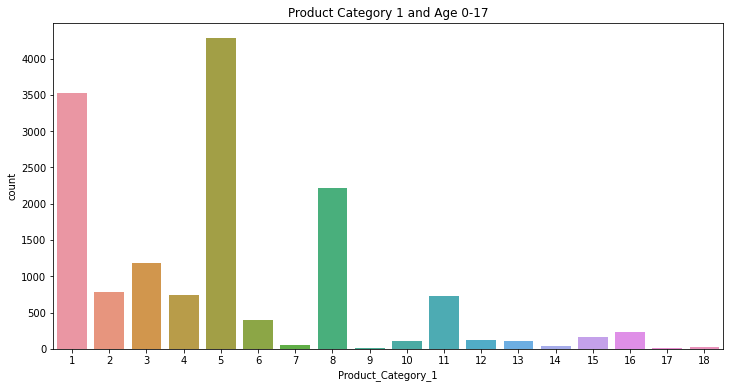

In [68]:
young_age_df = sales_df[sales_df['Age'] == '0-17']
# print(young_age_df)
plt.figure(figsize=(12,6))
sns.countplot(young_age_df['Product_Category_1'])
plt.title('Product Category 1 and Age 0-17')
plt.show()

It didn't answer our previous question about why is the age group 0-17 buying "expensive" items as we don't see any difference in the buying pattern.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


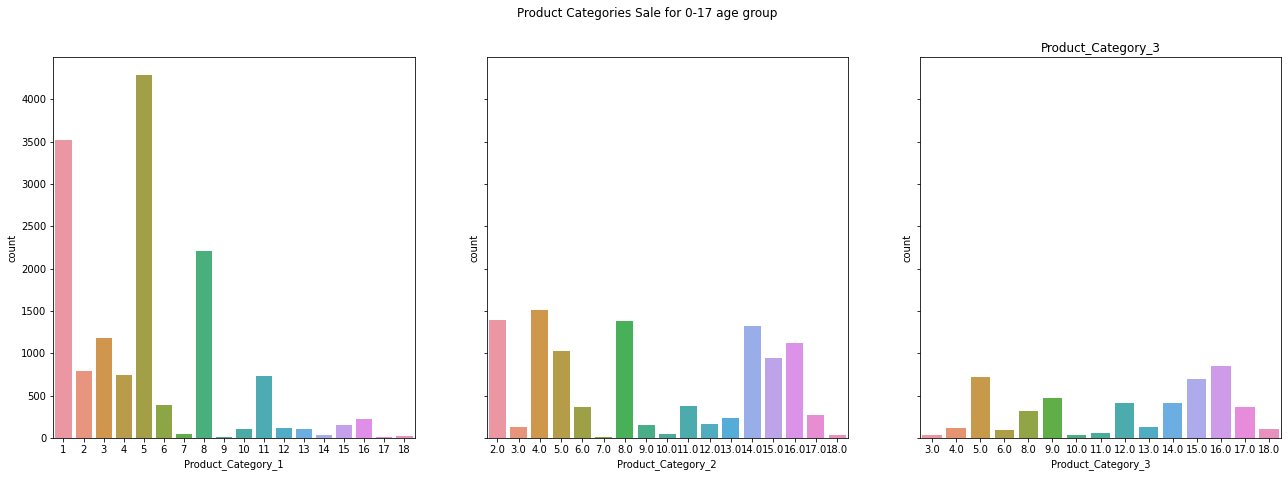

In [62]:
# Product Categories Average Purchases

fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
fig.suptitle('Product Categories Sale for 0-17 age group')

p_category_name = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for i in range(len(p_category_name)):
  sns.countplot(young_age_df[p_category_name[i]], ax = axes[i])
  plt.title(p_category_name[i])

plt.show()

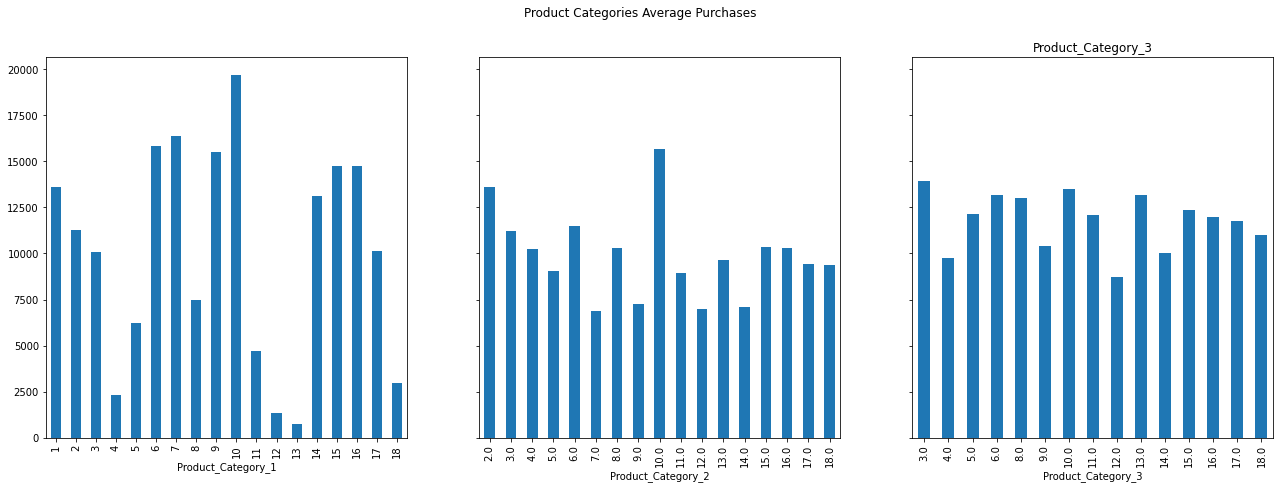

In [63]:
# Product Categories Average Purchases
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
fig.suptitle('Product Categories Average Purchases')

p_category_name = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for i in range(len(p_category_name)):
  sales_df.groupby(p_category_name[i])['Purchase'].mean().plot(kind='bar', ax=axes[i])
  plt.title(p_category_name[i])

plt.show()

#### **City_Category-based**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


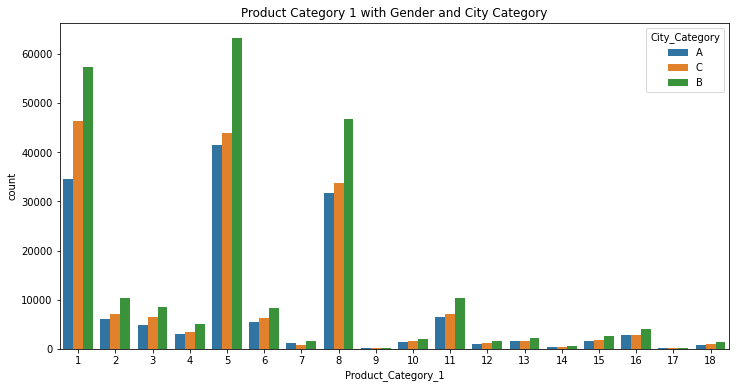

In [73]:
# Product Category and City Category
plt.figure(figsize=(12,6))
sns.countplot(sales_df['Product_Category_1'], hue=sales_df['combine_gender_marital'])
plt.title('Product Category 1 with Gender and Marital Status')
plt.show()

#### **Occupation-Based**

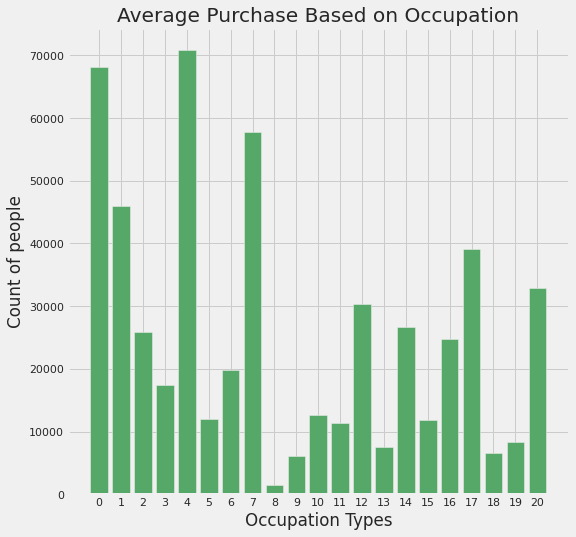

In [ ]:
#Average Purchase Count Based on Occupation:

purchase_occupation = sales_df['Occupation'].value_counts();
plt.figure(figsize = (8,8));
plt.bar(purchase_occupation.index, purchase_occupation.values, color ='g');
plt.xticks(purchase_occupation.index);
plt.xlabel('Occupation Types');
plt.ylabel('Count of people');
plt.title('Average Purchase Based on Occupation');

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


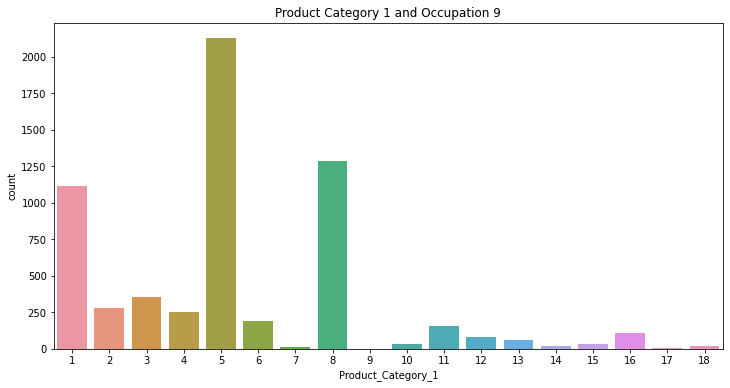

In [81]:
# Product Category and Occupation
occu_9_df = sales_df[sales_df['Occupation'] == 9]
# print(occu_9_df)
plt.figure(figsize=(12,6))
sns.countplot(occu_9_df['Product_Category_1'])
plt.title('Product Category 1 and Occupation 9')
plt.show()

## **Data Preprocessing**

In [ ]:
sales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


The ‘+’ value in ‘Age’ and ‘Stay_In_Current_City_Years’ needs to be fixed 

In [ ]:
sales_df['Age'] = sales_df['Age'].apply(lambda x:str(x).replace('55+', '55'))
sales_df['Stay_In_Current_City_Years'] = sales_df['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))
sales_df['Stay_In_Current_City_Years'] = sales_df['Stay_In_Current_City_Years'].astype('int')
sales_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55,16,C,4,0,8,0.0,0.0,7969


The features ‘User_ID’ and ‘Product_ID’ are irrelevant and these features need to be dropped.

In [ ]:
sales_df.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [ ]:
sales_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55,16,C,4,0,8,0.0,0.0,7969


‘Age’, ‘Gender’, and ‘City_Category’ are the discrete object features in our dataset which need to be encoded for further use. This can be done using the Label Encoder from sklearn’s preprocessing library.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_gender = LabelEncoder()
sales_df['Gender'] = label_encoder_gender.fit_transform(sales_df['Gender'])

label_encoder_age = LabelEncoder() 
sales_df['Age'] = label_encoder_age.fit_transform(sales_df['Age'])
label_encoder_city = LabelEncoder()
sales_df['City_Category'] = label_encoder_city.fit_transform(sales_df['City_Category'])

In [ ]:
sales_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969


The dataset is then split into X which contains all the independent features and Y which contains the dependent feature ‘Purchase’.

In [ ]:
X = sales_df.drop("Purchase", axis = 1)
Y = sales_df["Purchase"]

### **Feature Extraction**

<AxesSubplot:>

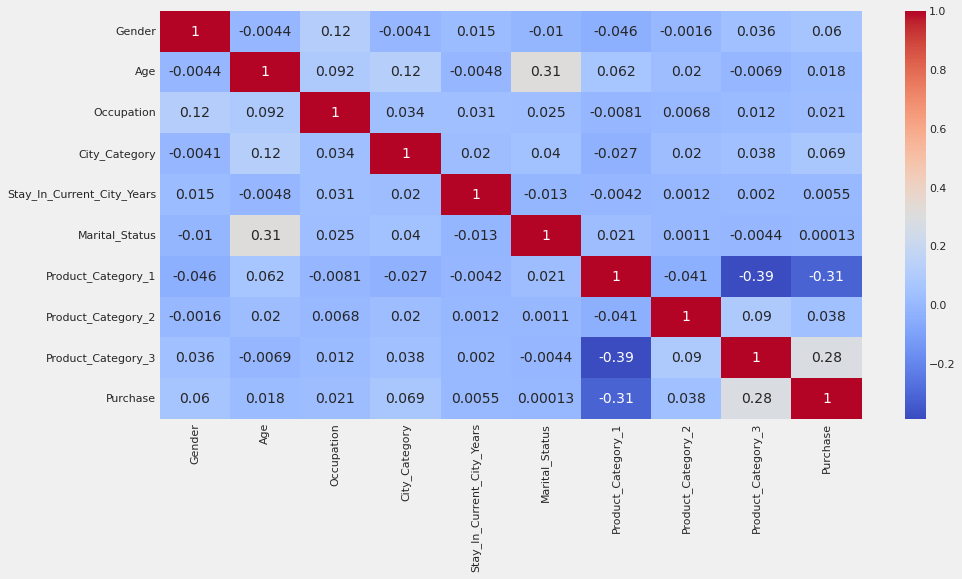

In [ ]:
corr = sales_df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

We can deal with the curse of multicollinearity by performing Feature Selection. The feature importances can be easily found by using the ExtraTreesRegressor.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor 
selector = ExtraTreesRegressor()
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.68
1 3.16
2 7.0
3 0.91
4 3.69
5 0.92
6 69.82
7 4.77
8 9.05


It tells us that ‘Gender’, ‘City_Category’, and ‘Marital_Status’ are the least significant features in the dataset which are dropped.

In [ ]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

For effective model building, we can standardize the dataset using Feature Scaling. This can be done with StandardScaler() from sklearn’s preprocessing library.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

The dataset is split into training data and testing data in the ratio 80:20 using the train_test_split() command.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (430061, 6)
X_test shape: (107516, 6)
Y_train shape: (430061,)
Y_test shape: (107516,)


## **Model Building**

In [ ]:
from xgboost import XGBRegressor 
xgb = XGBRegressor(random_state = 42)

xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
Y_pred_xgb

array([13060.287 , 13860.152 ,  7138.442 , ...,  6575.0005, 15903.009 ,
        6484.817 ], dtype=float32)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("XGB regression:")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB regression:
RMSE: 2923.231426324238
R2 score: 0.6558988174050149


In [ ]:
X_test

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
287383,-0.365786,1.366820,0.884260,-1.145266,-0.770316,1.775982
130087,-0.365786,0.906988,0.884260,-1.145266,1.483527,-0.617906
104368,1.112868,-1.238898,-0.666336,0.721053,-1.092294,-0.617906
370791,-0.365786,-0.625788,-0.666336,0.721053,1.483527,-0.617906
121991,-0.365786,-1.238898,0.884260,-0.078798,1.161549,-0.617906
...,...,...,...,...,...,...
381923,-1.105112,1.826653,-0.666336,0.721053,1.161549,-0.617906
261392,-0.365786,1.366820,0.108962,3.387224,-1.092294,-0.617906
327981,-0.365786,-0.625788,-1.441634,-0.078798,0.195616,-0.617906
478701,-0.365786,-1.238898,1.659557,0.187819,0.195616,-0.617906


In [ ]:
Y_pred_xgb = xgb.predict(X_test)
Y_pred_xgb

array([13060.287 , 13860.152 ,  7138.442 , ...,  6575.0005, 15903.009 ,
        6484.817 ], dtype=float32)

## **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]
params = {
"learning_rate"    : learning_rate,
"max_depth"        : max_depth,
"min_child_weight" : min_child_weight,
"gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}
xgb_tune = XGBRegressor(random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, verbose = 0, random_state = 42)
xgb_cv.fit(X_train, Y_train)
xgb_cv.best_score_

0.653075852927555

In [ ]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, verbosity = 0, random_state = 42)
xgb_best.fit(X_train, Y_train)
Y_pred_xgb_best = xgb_best.predict(X_test)
print("XGB regression: ") 
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best))) 
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2951.2320658387166
R2 score: 0.6492751895035931
